In [1]:
# define and move to dataset directory
datasetdir = 'train'
import os
os.chdir(datasetdir)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
# import the needed packages

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img
from tensorflow import keras
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)







2022-12-02 20:00:13.441793: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:

# shortcut to the ImageDataGenerator class
ImageDataGenerator = keras.preprocessing.image.ImageDataGenerator

In [3]:
gen = ImageDataGenerator()


In [4]:


iterator = gen.flow_from_directory(
    os.getcwd(), 
    target_size=(256,256), 
    classes=('Deinopis_Spider','Red_Knee_Tarantula', 'Peacock_Spider'),
    color_mode = 'rgb'
)
# # print(np.shape(iterator))
# print(len(iterator))
# type(iterator[0]) #iterator ma ilosc bachy

# print(np.shape(iterator[0][0][0])) #pierwszy obrazek z pierwszego batcha 
# # |pierwsze zero to ktory batch | drugie to tupel |  trzcie to wyciagniecie z batcha pierwszego obrazka
# plt.imshow(iterator[0][0][0])






Found 404 images belonging to 3 classes.


In [5]:
batch = iterator.next()
# len(batch)


In [6]:

# def plot_images(batch):
#     imgs = batch[0]
#     labels = batch[1]
#     ncols, nrows = 4,8
#     fig = plt.figure( figsize=(ncols*3, nrows*3), dpi=90)
#     for i, (img,label) in enumerate(zip(imgs,labels)):
#       plt.subplot(nrows, ncols, i+1)
#       plt.imshow(img.astype(np.int))
#       assert(label[0]+label[1]==1.)
#       categ = 'dein' if label[0]>0.5 else 'red'
#       print(label[0], " l1: ", label[1])
#       plt.title( '{} {}'.format(str(label), categ))
#       plt.axis('off')

# plot_images(batch)

In [7]:
imgdatagen = ImageDataGenerator(
    rescale = 1/255., 
    validation_split = 0.2,
)

In [8]:
batch_size = 32
height, width = (256,256)

train_dataset = imgdatagen.flow_from_directory(
    os.getcwd(),
    target_size = (height, width), 
    classes = ('Deinopis_Spider','Red_Knee_Tarantula','Peacock_Spider'),
    batch_size = batch_size,
    subset = 'training',
    shuffle = True,
    class_mode="categorical",
    color_mode="rgb"
)

val_dataset = imgdatagen.flow_from_directory(
    os.getcwd(),
    target_size = (height, width), 
    classes = ('Deinopis_Spider','Red_Knee_Tarantula','Peacock_Spider'),
    batch_size = batch_size,
    subset = 'validation',
    shuffle = True,
    class_mode="categorical",
    color_mode="rgb"
)

ValueError: Invalid class_mode: int; expected one of: {None, 'categorical', 'binary', 'input', 'sparse'}

In [ ]:
model = keras.models.Sequential()

initializers = {
    
}
model.add( 
    keras.layers.Conv2D(
        24, 5, input_shape=(256,256,3), 
        activation='relu', 
    )
)
model.add( keras.layers.MaxPooling2D(2) )
model.add( 
    keras.layers.Conv2D(
        48, 5, activation='relu', 
    )
)
model.add( keras.layers.MaxPooling2D(2) )
model.add( 
    keras.layers.Conv2D(
        96, 5, activation='relu', 
    )
)
model.add( keras.layers.Flatten() )
model.add( keras.layers.Dropout(0.9) )

model.add( keras.layers.Dense(
    3, activation='softmax',
    )
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 24)      1824      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 24)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 48)      28848     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 48)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 57, 57, 96)        115296    
                                                                 
 flatten (Flatten)           (None, 311904)            0

In [ ]:
model.compile(optimizer = "adam",loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
history = model.fit(
    train_dataset, 
    validation_data = val_dataset,
    workers=10,
    epochs=10,
    batch_size = batch_size
)

Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "/usr/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/home/michaelangelo/.local/lib/python3.8/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/michaelangelo/.local/lib/python3.8/site-packages/traitlets/config/application.py", line 985, in launch_instance
      app.start()
    File "/home/michaelangelo/.local/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/home/michaelangelo/.local/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/usr/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/usr/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/home/michaelangelo/.local/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/home/michaelangelo/.local/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/home/michaelangelo/.local/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/home/michaelangelo/.local/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/home/michaelangelo/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/home/michaelangelo/.local/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/michaelangelo/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2940, in run_cell
      result = self._run_cell(
    File "/home/michaelangelo/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2995, in _run_cell
      return runner(coro)
    File "/home/michaelangelo/.local/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/michaelangelo/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3194, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/michaelangelo/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3373, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/michaelangelo/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3433, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_17304/2314614585.py", line 1, in <module>
      history = model.fit(
    File "/home/michaelangelo/.local/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/michaelangelo/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/michaelangelo/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "/home/michaelangelo/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/michaelangelo/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "/home/michaelangelo/.local/lib/python3.8/site-packages/keras/engine/training.py", line 994, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/michaelangelo/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1052, in compute_loss
      return self.compiled_loss(
    File "/home/michaelangelo/.local/lib/python3.8/site-packages/keras/engine/compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/michaelangelo/.local/lib/python3.8/site-packages/keras/losses.py", line 152, in __call__
      losses = call_fn(y_true, y_pred)
    File "/home/michaelangelo/.local/lib/python3.8/site-packages/keras/losses.py", line 272, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/michaelangelo/.local/lib/python3.8/site-packages/keras/losses.py", line 2084, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "/home/michaelangelo/.local/lib/python3.8/site-packages/keras/backend.py", line 5630, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
logits and labels must have the same first dimension, got logits shape [32,3] and labels shape [96]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_804]

In [ ]:
# import cv2
# os.chdir("../test")

1/1 [==============================] - 0s 34ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[0. 1.]]


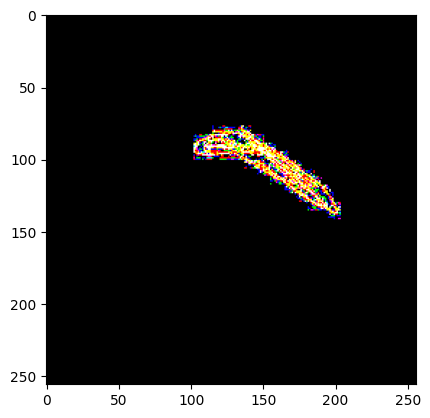

In [ ]:
# # type(plt.imread("Red_Knee_Tarantula/red.069.jpg"))
# temp = np.empty((1,256,256,3))
# temp[0]=cv2.resize(plt.imread("gowno_test.jpg"),(256,256),interpolation= cv2.INTER_NEAREST)

# print(model.predict([temp]))

# plt.imshow(temp[0])


# temp[0]=cv2.resize(plt.imread("Red_Knee_Tarantula/red.069.jpg"),(256,256))
# iterator = gen.flow_from_directory(
#     os.getcwd(), 
#     target_size=(256,256), 
#     classes=('Deinopis_Spider','Red_Knee_Tarantula')
# )


# val_los , val_acc = model.evaluate(iterator)




# loss: 0.0635 - acc: 0.9848 
